# Report: Final Project (Machine Learning)

## 1. Introduction

- In this report, I will present the process of training a classification machine learning model on the provided dataset, aiming to achieve the highest possible performance based on some evaluation metrics.

## 2. Import datasets and necessary libraries

In [55]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from google.colab import drive

In [56]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Malware_subset.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,43399,443,6,36586,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
1,40422,443,6,36984,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
2,56977,80,6,15638963,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
3,60652,80,6,15660249,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
4,44512,80,6,14456391,5,3,268.0,519.0,268.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO


## 3. Data preprocessing

### **Data Exploration**

In [57]:
# Handle missing data
print(f"Number of missing data: {df.isnull().any().sum()}")

# Drop all NaN and infinite numbers
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(f"NaN and infinite numbers: {df.isnull().sum().sum()}")

# Drop all duplicates
df = df.drop_duplicates()
print(f"Number of duplicates: {df.duplicated().sum()}")

# Drop all data that contain full values of -1 or 0
df = df.loc[:, ~((df == 0) | (df == -1)).all(axis=0)]

Number of missing data: 0
NaN and infinite numbers: 0
Number of duplicates: 0


#### Filtering catergorical and numerical columns

In [58]:
cat_col = [col for col in df.columns if df[col].dtype=='object']
num_col = [col for col in df.columns if df[col].dtype!='object']

print(f'Number of categorical columns: {len(cat_col)}')
print(f'Catergorial columns: {cat_col}')
print(f'Number of numerical columns: {len(num_col)}')
print(f'Numerical columns: {num_col}')

Number of categorical columns: 1
Catergorial columns: ['Label']
Number of numerical columns: 68
Numerical columns: [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count

#### The categories of targeted column

In [78]:
print(f'Label: {df["Label"].unique()}')

Label: ['ADWARE_FEIWO' 'BENIGN' 'ADWARE_GOOLIGAN' 'ADWARE_KOODOUS'
 'ADWARE_SHUANET' 'ADWARE_YOUMI' 'ADWARE_DOWGIN' 'ADWARE_MOBIDASH'
 'ADWARE_SELFMITE' 'ADWARE_KEMOGE' 'ADWARE_EWIND']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Label'])
df['Label'] = encoder.fit_transform(df['Label'])

### **Data Distribution Visualization**

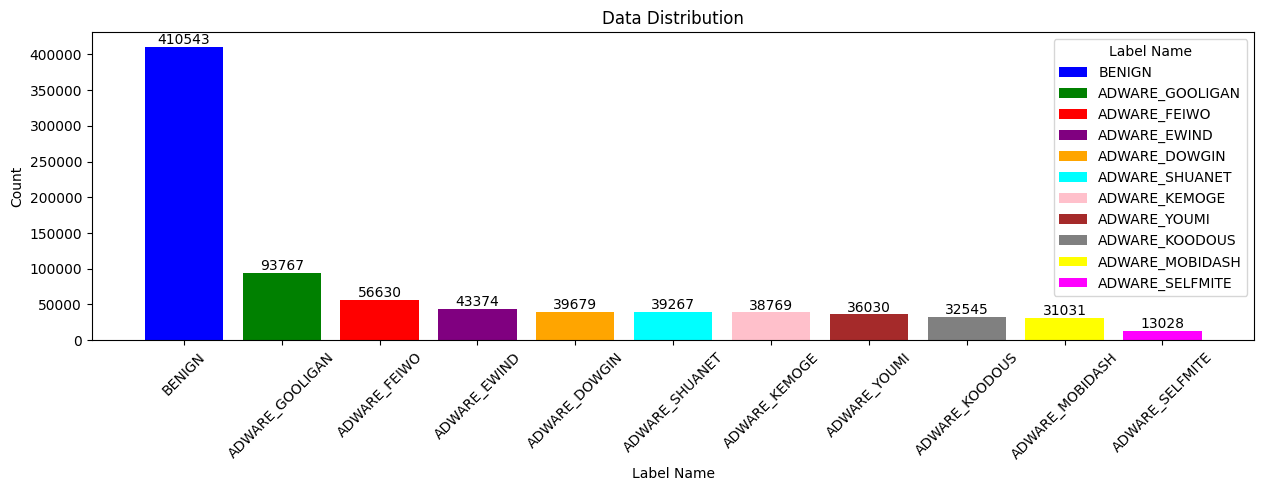

In [65]:
# Set the width and height size
plt.figure(figsize=(15,4))

# Get labels and values of column 'Label'
labels = df['Label'].value_counts().index.to_numpy()
values = df['Label'].value_counts().values

# Create colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'pink', 'brown', 'gray', 'yellow', 'magenta']

# Create bars
bars = plt.bar(labels, values, align='center',label=labels, color=colors)

# Title & labels
plt.title('Data Distribution')
plt.xlabel('Label Name')
plt.ylabel('Count')
plt.legend(title='Label Name')
plt.xticks(rotation=45)

# Add value labels on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=10)

- Through above bar chart, we can assume that this is the imbalanced dataset.

In [67]:
corr_df=df.corr(numeric_only=True)['Label']
corr_df
corr_df.to_csv('corr_df.csv',index=True)
corr_df = corr_df.to_frame()
plt.figure(figsize=(10,15))
sns.heatmap(corr_df,annot=True,cmap='coolwarm')
plt.title("Correlation Between Features and Target")
plt.show()

KeyError: 'Label'